# Seidel Singularity Notebook 

In this notebook we search among all non-isomorphic trees of order 17 to find the ones with singular Seidel matrix. It can be seen that for only two of such trees, $\phi \in \{\pm 1\}^{17}$.

phi = [-1. -5.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -7.  3. -5. -5.]


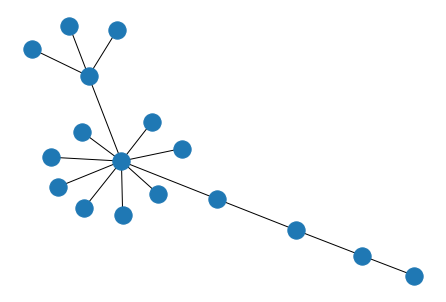

phi = [-3.  7. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  5.  5.  5.]


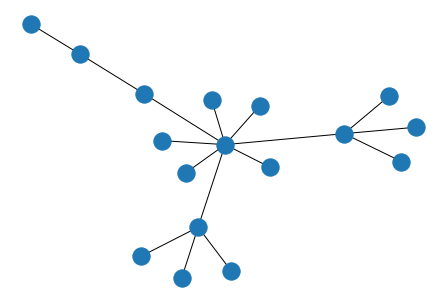

phi = [-3.  3.  3.  5.  1.  1.  1.  1. -3. -3. -3.  3. -3. -3. -1.  1.  3.]


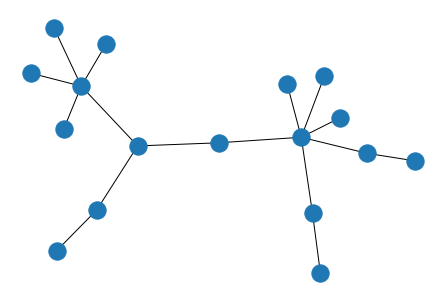

phi = [ 3.  3.  3. -3.  5.  1.  1.  1.  1. -3. -3. -3. -3. -3. -1.  1.  3.]


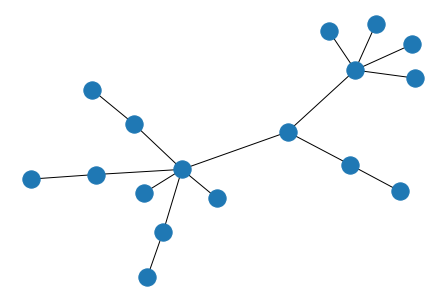

phi = [ 1. -3. -3.  3.  3.  3.  3. -1. -1. -1. -1. -5.  3.  3. -3. -3. -1.]


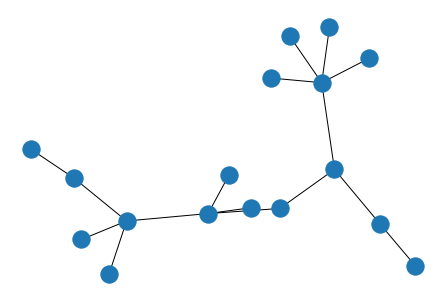

phi = [-3. -3.  3. -5.  3.  3.  3. -1. -1. -1. -1.  3.  3.  1. -3. -3. -1.]


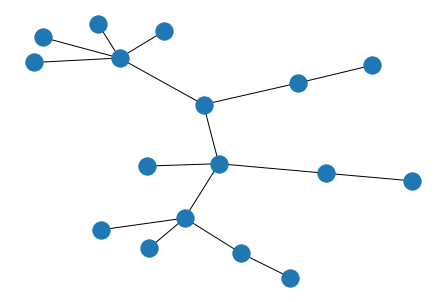

phi = [  5.  -3.  -5.   1.  -1. -11.   3.   3.   3.   3.   3.  -9.   3.   1.
   7.  -1.  -1.]


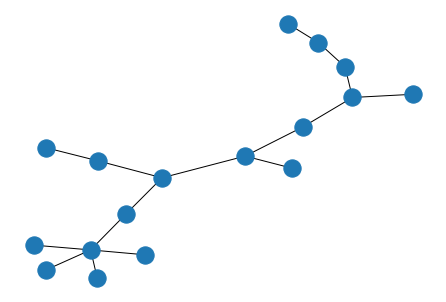

phi = [  7.66666667   7.66666667   7.66666667  -7.          11.
  -7.          11.         -11.           7.           7.
 -10.33333333 -10.33333333 -10.33333333  -3.          -3.
  -1.           9.        ]


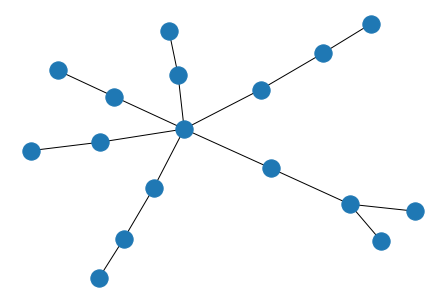

phi = [  9.   9.   7.   7.   7.   7.   5. -17.   5. -17. -13. -13.  -1.  -1.
  11.  11. -11.]


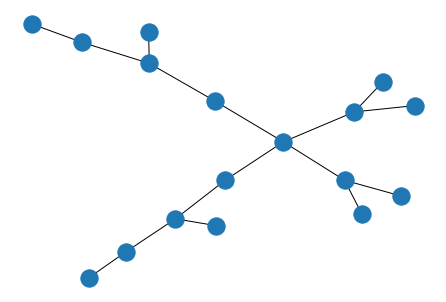

phi = [ 1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.]


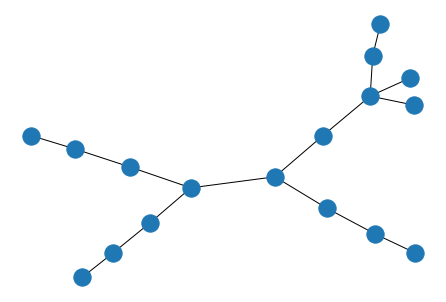

phi = [-1.66666667  2.33333333  2.33333333 -1.66666667  2.33333333  2.33333333
 -1.66666667 -1.66666667 -1.66666667 -1.66666667 -1.         -1.
 -1.         -1.          1.          1.          3.        ]


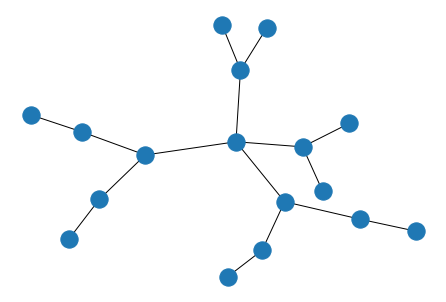

phi = [  3.   7.   3.   3.   3. -13.   5.   5.   5.  -9. -11.  -3.  -3.  -3.
   9.  -1.   3.]


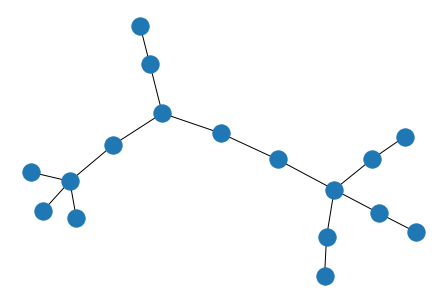

phi = [-1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.]


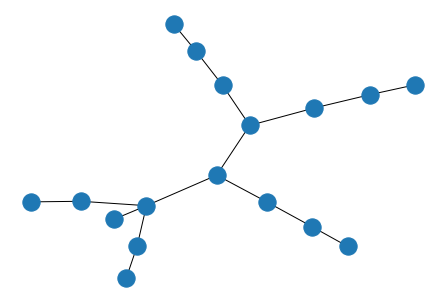

phi = [ 15.   5.   5. -17.  -3.   7.  -3.   7.  -7. -21.  -1.  -1.  13.   1.
   1.   3.   5.]


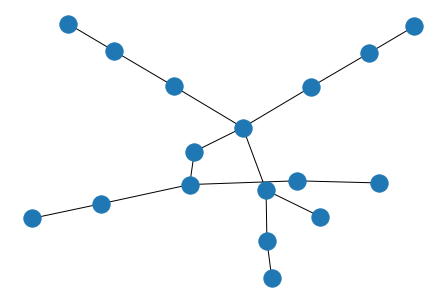

phi = [ 15.  11.  -1.  -9.  -3.  11. -21. -19.  17. -23. -15.   9.   5.   3.
  19.  13.  -5.]


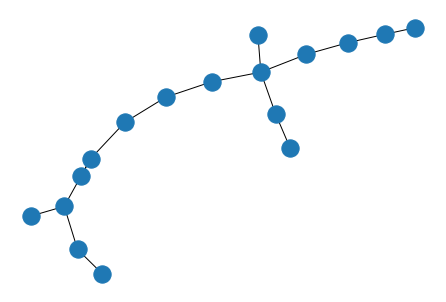

15


In [20]:
import numpy as np
import scipy.linalg
import networkx as nx
import math
import matplotlib.pyplot as plt

graphs = nx.read_graph6("trees17.g6.txt")
singular_seidel_counter = 0

for G in graphs:
    Adj = nx.adjacency_matrix(G)
    Adj = (Adj.todense())
    
    n = Adj.shape[0]
    J = np.ones((n, n))
    I = np.eye(n)
    S = J - I - 2 * Adj
    
    if math.isclose(np.linalg.det(S), 0., abs_tol=1e-5):
        singular_seidel_counter += 1
        
        phi = scipy.linalg.null_space(S)[:,0]
        phi /= np.min(np.abs(phi))
        
        print("phi =", phi)
        nx.draw(G)
        plt.show()
            
print(singular_seidel_counter)